# Setup Environment

In [1]:
# Install libraries
!pip install pandas numpy matplotlib seaborn scipy sklearn

In [2]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading datasets
# main dataset
df = pd.read_csv('../data/covid_19_data.csv',sep=';')
# region and climate dataset
df_cat = pd.read_csv('../data/covid_19_data_cat.csv')

print("=======================================================")
print(df)
print("=======================================================")
print(df.info())

             date           province         country  confirmed  deaths  \
0      01/22/2020              Anhui  Mainland China          1       0   
1      01/22/2020            Beijing  Mainland China         14       0   
2      01/22/2020          Chongqing  Mainland China          6       0   
3      01/22/2020             Fujian  Mainland China          1       0   
4      01/22/2020              Gansu  Mainland China          0       0   
...           ...                ...             ...        ...     ...   
85633    08/12/20  Zaporizhia Oblast         Ukraine        971      22   
85634    08/12/20            Zeeland     Netherlands        950      69   
85635    08/12/20           Zhejiang  Mainland China       1275       1   
85636    08/12/20    Zhytomyr Oblast         Ukraine       2215      48   
85637    08/12/20       Zuid-Holland     Netherlands      15765    1314   

       recovered  
0              0  
1              0  
2              0  
3              0  
4   

# Dataset Information

In [3]:
# No. of columns and rows
print("Number of Columns:", len(df.columns))
print("Number of Rows:", len(df))

# No. of countries
print("Number of Countries:", len(df.country.unique()))

# Convert data type
df['date'] = df['date'].astype('datetime64[ns]')
df['date'] = pd.to_datetime(df['date'], format='%y%m%d').dt.date

# No. of days
print("Number of Days:", len(df.date.unique()))
print("Since:", min(df.date))
print("Until:", max(df.date))

Number of Columns: 6
Number of Rows: 85638
Number of Countries: 223
Number of Days: 204
Since: 2020-01-22
Until: 2020-08-12


#### Replace some values in the 'country' column so that there are no different names for the same country:
'original data','replace with this data':
<br>
"('St. Martin',)",'St. Martin'
<br>
' Azerbaijan','Azerbaijan'
<br>
'Cabo Verde','Cape Verde'
<br>
'Congo (Brazzaville)','Congo'
<br>
'Congo (Kinshasa)','Congo'
<br>
'North Ireland','Ireland'
<br>
'North Macedonia','Macedonia'
<br>
'occupied Palestinian territory','Palestine'
<br>
'Holy See','Vatican'
<br>
'Republic of Ireland','Ireland'
<br>
'The Bahamas','Bahamas'
<br>
'The Gambia','Gambia'
<br>
'Bahamas, The','Bahamas'
<br>
'Gambia, The','Gambia'
<br>
'Vatican City','Vatican'
<br>
'East Timor','Timor-Leste'
<br>
'West Bank and Gaza','Palestine'
<br>
'MS Zaandam','Others'
<br>
'Diamond Princess','Others'

In [4]:
# replace with this data
replace_country = {"('St. Martin',)":'St. Martin',
                   ' Azerbaijan':'Azerbaijan',
                   'Cabo Verde':'Cape Verde',
                   'Congo (Brazzaville)':'Congo',
                   'Congo (Kinshasa)':'Congo',
                   'North Ireland':'Ireland',
                   'North Macedonia':'Macedonia',
                   'occupied Palestinian territory':'Palestine',
                   'Holy See':'Vatican',
                   'Republic of Ireland':'Ireland',
                   'The Bahamas':'Bahamas',
                   'The Gambia':'Gambia',
                   'Bahamas, The':'Bahamas',
                   'Gambia, The':'Gambia',
                   'Vatican City':'Vatican',
                   'East Timor':'Timor-Leste',
                   'West Bank and Gaza':'Palestine',
                   'MS Zaandam':'Others',
                   'Diamond Princess':'Others'
                  }

df = df.replace({"country": replace_country})

In [5]:
# New no. of countries
print("Number of Countries:", len(df.country.unique()))

Number of Countries: 207


####  Several 'countries' on the 'df' dataframe have daily data divided into several 'provinces'. Accumulate the 'confirmed', 'deaths' and 'recovered' data for these provinces so that the daily data for each country is only represented by one row by creating a new dataframe 'df_new'.

In [6]:
print("Daily Data for Each Country")
df_new = df.groupby(by=['country', 'date']).sum().reset_index()
print(df_new)

Daily Data for Each Country
           country        date  confirmed  deaths  recovered
0      Afghanistan  2020-02-24          1       0          0
1      Afghanistan  2020-02-25          1       0          0
2      Afghanistan  2020-02-26          1       0          0
3      Afghanistan  2020-02-27          1       0          0
4      Afghanistan  2020-02-28          1       0          0
...            ...         ...        ...     ...        ...
30548     Zimbabwe  2020-08-08       4575     102       1416
30549     Zimbabwe  2020-08-09       4649     104       1437
30550     Zimbabwe  2020-08-10       4748     104       1524
30551     Zimbabwe  2020-08-11       4818     104       1524
30552     Zimbabwe  2020-08-12       4893     122       1620

[30553 rows x 5 columns]


#### Drop all rows in 'df_new' which data 'confirmed' is below 100

In [7]:
print("Daily Data for Each Country Which Confimed >= 100")
df_new = df_new[df_new['confirmed'] >= 100]
print(df_new)

Daily Data for Each Country Which Confimed >= 100
           country        date  confirmed  deaths  recovered
32     Afghanistan  2020-03-27        110       4          2
33     Afghanistan  2020-03-28        110       4          2
34     Afghanistan  2020-03-29        120       4          2
35     Afghanistan  2020-03-30        170       4          2
36     Afghanistan  2020-03-31        174       4          5
...            ...         ...        ...     ...        ...
30548     Zimbabwe  2020-08-08       4575     102       1416
30549     Zimbabwe  2020-08-09       4649     104       1437
30550     Zimbabwe  2020-08-10       4748     104       1524
30551     Zimbabwe  2020-08-11       4818     104       1524
30552     Zimbabwe  2020-08-12       4893     122       1620

[22550 rows x 5 columns]


#### Add 'region' and 'climate' columns to 'df_new' and fill in the region and climate for each country by referring to 'df_cat' 

In [8]:
print("Add 'region' and 'climate' columns")
df_new = df_new.merge(df_cat, how='left', on="country")
print(df_new)
df_new.to_csv('covid-aug-20.csv')

Add 'region' and 'climate' columns
           country        date  confirmed  deaths  recovered          region  \
0      Afghanistan  2020-03-27        110       4          2  Asia & Pacific   
1      Afghanistan  2020-03-28        110       4          2  Asia & Pacific   
2      Afghanistan  2020-03-29        120       4          2  Asia & Pacific   
3      Afghanistan  2020-03-30        170       4          2  Asia & Pacific   
4      Afghanistan  2020-03-31        174       4          5  Asia & Pacific   
...            ...         ...        ...     ...        ...             ...   
22545     Zimbabwe  2020-08-08       4575     102       1416          Africa   
22546     Zimbabwe  2020-08-09       4649     104       1437          Africa   
22547     Zimbabwe  2020-08-10       4748     104       1524          Africa   
22548     Zimbabwe  2020-08-11       4818     104       1524          Africa   
22549     Zimbabwe  2020-08-12       4893     122       1620          Africa   

    

#### Create a line plot based on dataframe 'df_new' with data 'date' as x and data 'confirmed' as y, where each line represents the accumulative data of each region 

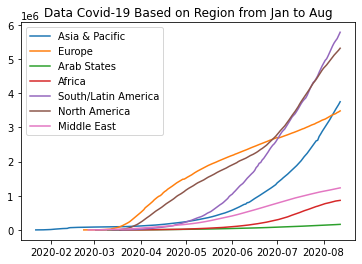

In [9]:
# get data for each region
df_asipac = df_new[df_new['region'] == 'Asia & Pacific'].groupby(by=['date']).sum().reset_index()
df_europe = df_new[df_new['region'] == 'Europe'].groupby(by=['date']).sum().reset_index()
df_arab = df_new[df_new['region'] == 'Arab States'].groupby(by=['date']).sum().reset_index()
df_africa = df_new[df_new['region'] == 'Africa'].groupby(by=['date']).sum().reset_index()
df_latin = df_new[df_new['region'] == 'South/Latin America'].groupby(by=['date']).sum().reset_index()
df_northam = df_new[df_new['region'] == 'North America'].groupby(by=['date']).sum().reset_index()
df_mideast = df_new[df_new['region'] == 'Middle east'].groupby(by=['date']).sum().reset_index()

# plot based on date
plt.plot(df_asipac["date"], df_asipac["confirmed"], label="Asia & Pacific")
plt.plot(df_europe["date"], df_europe["confirmed"], label="Europe")
plt.plot(df_arab["date"], df_arab["confirmed"], label="Arab States")
plt.plot(df_africa["date"], df_africa["confirmed"], label="Africa")
plt.plot(df_latin["date"], df_latin["confirmed"], label="South/Latin America")
plt.plot(df_northam["date"], df_northam["confirmed"], label="North America")
plt.plot(df_mideast["date"], df_mideast["confirmed"], label="Middle East")
plt.legend(loc='upper left')
plt.title("Data Covid-19 Based on Region from Jan to Aug")
plt.show()

#### Create a line plot based on dataframe 'df_new' with data 'date' as x and data 'confirmed' as y, where each line represents the accumulative data of each climate 

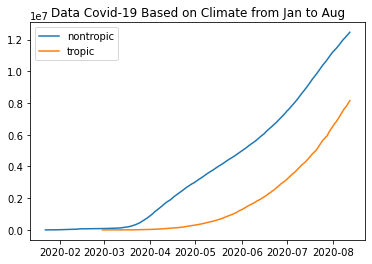

In [10]:
# get data for each climate
df_nontropic = df_new[df_new['climate'] == 'nontropic'].groupby(by=['date']).sum().reset_index()
df_tropic = df_new[df_new['climate'] == 'tropic'].groupby(by=['date']).sum().reset_index()

# plot based on date
plt.plot(df_nontropic["date"], df_nontropic["confirmed"], label="nontropic")
plt.plot(df_tropic["date"], df_tropic["confirmed"], label="tropic")
plt.legend(loc='upper left')
plt.title("Data Covid-19 Based on Climate from Jan to Aug")
plt.show()

#### Create a dataframe 'df_last' that only contains data from the last date of 'df_new', where each row shows data for 'confirmed', 'deaths', 'recovered', 'region', and 'climate' for each country. 

In [11]:
# get last updated data for each country
print("Last Updated Data for Each Country")
df_last = df_new.groupby(by=["country"]).max().reset_index()
print(df_last)
df_last.to_csv('last_update_covid.csv')

Last Updated Data for Each Country
         country        date  confirmed  deaths  recovered  \
0    Afghanistan  2020-08-12      37345    1354      26694   
1        Albania  2020-08-12       6817     208       3552   
2        Algeria  2020-08-12      36699    1333      25627   
3        Andorra  2020-08-12        977      53        855   
4         Angola  2020-08-12       1762      80        577   
..           ...         ...        ...     ...        ...   
170    Venezuela  2020-08-12      29088     247      21042   
171      Vietnam  2020-08-12        883      18        451   
172        Yemen  2020-08-12       1841     528        937   
173       Zambia  2020-08-12       8501     246       7233   
174     Zimbabwe  2020-08-12       4893     122       1620   

                  region    climate  
0         Asia & Pacific  nontropic  
1                 Europe  nontropic  
2            Arab States  nontropic  
3                 Europe  nontropic  
4                 Africa     t

####  Based on the df last, identify the top 10 countries with the highest data for 'deaths' and then create the barplot.

    country        date  confirmed  deaths  recovered               region  \
164      US  2020-08-12    5197118  166026    1753760        North America   
22   Brazil  2020-08-12    3164785  104201    2506228  South/Latin America   
104  Mexico  2020-08-12     498380   54666     401182  South/Latin America   
71    India  2020-08-12    2396637   47033    1695982       Asia & Pacific   
163      UK  2020-08-12     315581   46791       1472               Europe   
77    Italy  2020-08-12     251713   35225     202697               Europe   
55   France  2020-08-12     244088   30375      83609               Europe   
148   Spain  2020-08-12     329784   28752     150376               Europe   
126    Peru  2020-08-12     489680   21501     341938  South/Latin America   
73     Iran  2020-08-12     333699   18988     290244          Middle east   

       climate  
164  nontropic  
22      tropic  
104     tropic  
71      tropic  
163  nontropic  
77   nontropic  
55   nontropic  
148  

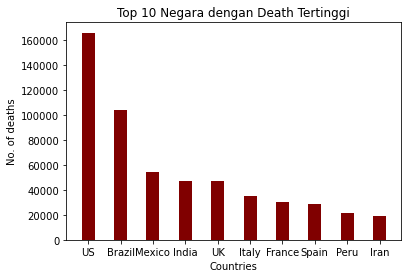

In [12]:
# identify the top 10 countries with the highest number of deaths
df_10 = df_last.sort_values(by=['deaths'], ascending=False).head(10)
print(df_10)

# creating the bar plot 
plt.bar(df_10["country"], df_10["deaths"], color ='maroon', width = 0.4) 
  
plt.xlabel("Countries") 
plt.ylabel("No. of deaths") 
plt.title("Top 10 Negara dengan Death Tertinggi") 
plt.show()

#### Perform EDA on the 'df_last' dataframe for the 'confirmed', 'deaths' and 'recovered' columns using a scatter matrix (distinguish the scatter plot colors by region) 

Text(0.5, 1.08, 'Scatter Matrix By Region')

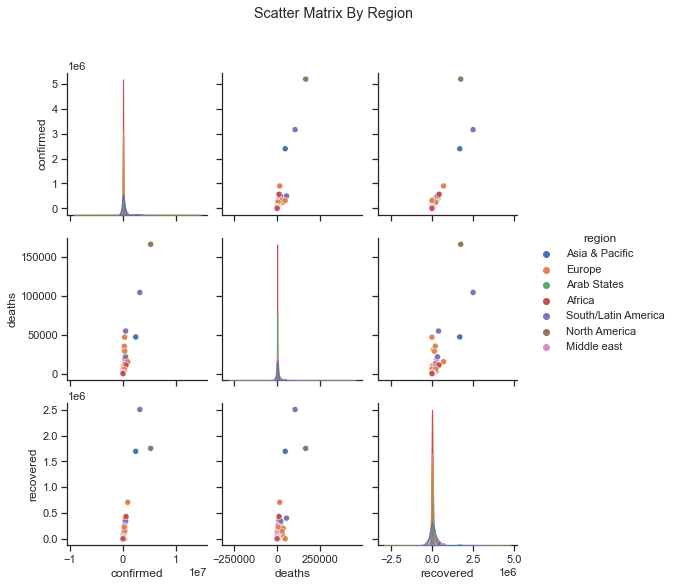

In [13]:
# import library
import seaborn as sns
sns.set_theme(style="ticks")

# create a scatter matrix for region
ax = sns.pairplot(df_last, hue="region")
ax.fig.suptitle("Scatter Matrix By Region", y=1.08)

#### Perform EDA on the 'df_last' dataframe for the 'confirmed', 'deaths' and 'recovered' columns using a scatter matrix (distinguish the scatter plot colors by climate) 

Text(0.5, 1.08, 'Scatter Matrix Berdasarkan Climate')

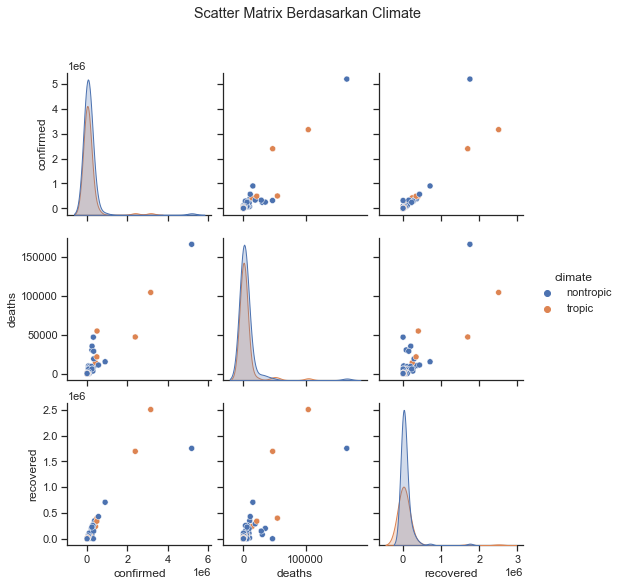

In [14]:
sns.set_theme(style="ticks")

ax= sns.pairplot(df_last, hue="climate")
ax.fig.suptitle("Scatter Matrix Berdasarkan Climate", y=1.08)

####  Based on the results in 4.c. and d., what data do visually appear to have a normal distribution?

None

#### Confirm the answer to question 5.a. by using the normality test from the scipy module. 

In [15]:
# import library
from scipy.stats import normaltest

# alpha value
alpha = 0.05

# 'confirmed' normality test
print("====================confirmed==========================")
stat, p = normaltest(df_last["confirmed"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Normal Distribution (fail to reject H0)')
else:
    print('Not Normal Distribution (reject H0)')
    
# 'deaths' normality test
print("======================deaths===========================")
stat, p = normaltest(df_last["deaths"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Normal Distribution (fail to reject H0)')
else:
    print('Not Normal Distribution (reject H0)')
    
# 'recovered' normality test
print("=====================recovered=========================")
stat, p = normaltest(df_last["recovered"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Normal Distribution (fail to reject H0)')
else:
    print('Not Normal Distribution (reject H0)')

====================confirmed==========================
Statistics=291.709, p=0.000
Not Normal Distribution (reject H0)
======================deaths===========================
Statistics=272.065, p=0.000
Not Normal Distribution (reject H0)
=====================recovered=========================
Statistics=261.179, p=0.000
Not Normal Distribution (reject H0)


#### Perform an independent t-test to test whether or not a correlation between 'climate' and 'confirmed' in 'df_last'.

In [16]:
# import library
from scipy import stats

# convert data type 'climate'
df_last["climate"] = df_last["climate"].astype('category')
df_last["climate_cat_codes"] = df_last["climate"].cat.codes

# perform independent t-test
stat, p = stats.ttest_ind(df_last['confirmed'], df_last['climate_cat_codes'])

# hypothesis
if p > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

reject H0


#### If alpha value = 0.05, can the H0 that 'there is no correlation between the climate group and the' Confirmed 'data be rejected? What is the reason?

There is a correlation between the climate groups and the data confirmed because the p-value was smaller than the alpha value

#### Build a classifier model to predict region of 'X_new' based on the 'confirmed', 'deaths' and 'recovered' data contained in 'df_last'. Show the accuracy of the model using a train-test split.

In [17]:
# import library
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

# path graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\kevin\\anaconda3\\Library\\bin\\graphviz'

# drop na if exists
df_last = df_last.dropna()

# train-test split
X = df_last.iloc[:,2:5]
y = df_last["region"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# modeling
clf = RandomForestClassifier(n_estimators=100, max_features="auto", max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, bootstrap=True)
clf = clf.fit(X_train, y_train)

# predict test data
y_pred = clf.predict(X_test)

# scoring
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5294117647058824


In [18]:
# # import library
# from sklearn.model_selection import GridSearchCV

# # parameter grid
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# parameters = {"n_estimators": n_estimators,
#               "max_features": max_features,
#               "min_samples_split": max_depth,
#               "min_samples_leaf": min_samples_split,
#               "bootstrap": bootstrap
#              }

# # parameter optimization
# gs = GridSearchCV(clf, param_grid=parameters, cv=2, verbose=1, n_jobs=-1)
# gs.fit(X, y)

# # best parameter
# print("Best Param:", gs.best_params_)
# print("Best Estimator:", gs.best_estimator_)
# print("Best Score:", gs.best_score_)

DecisionTreeClassifier(max_features='auto', random_state=1753188191)


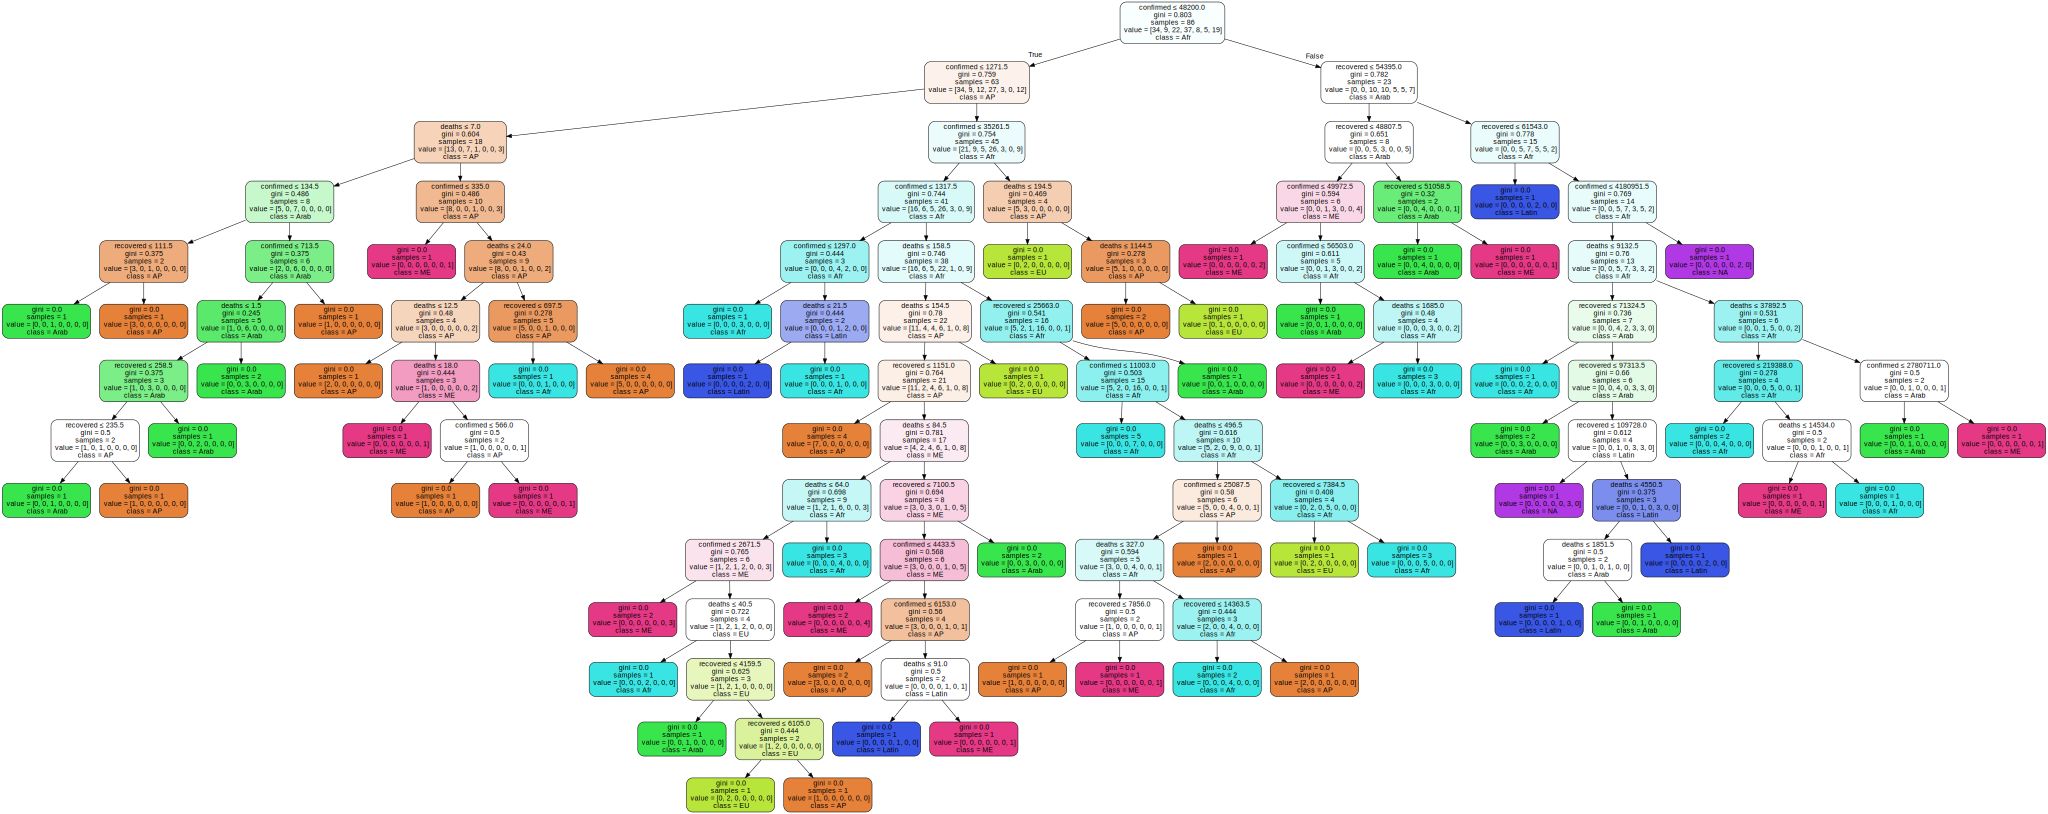

In [19]:
# extract single tree
estimator = clf.estimators_[0]
print(estimator)

# visualizing
fn = ["confirmed", "deaths", "recovered"]
cn = ['AP', 'EU', 'Arab', 'Afr', 'Latin','NA', 'ME']

dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=fn,
                           class_names=cn,
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
# graph.render('dtree_region',view=True)

In [20]:
# predict new data
X_new=np.array([[1000,30,200],
                [2000,40,400],
                [50,1,2]])

y_pred = clf.predict(X_new)
print(y_pred)

['South/Latin America' 'Africa' 'Asia & Pacific']


Feature: 0, Score: 0.33007
Feature: 1, Score: 0.32089
Feature: 2, Score: 0.34904


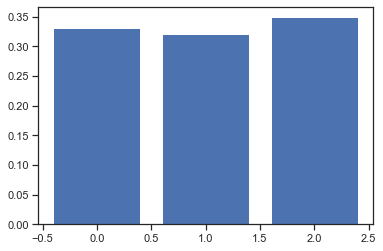

In [21]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Build a classifier model to predict climate of 'X_new' based on the 'confirmed', 'deaths' and 'recovered' data contained in 'df_last'. Show the accuracy of the model using a train-test split.

In [22]:
# train-test split
X = df_last.iloc[:,2:5]
y = df_last["climate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# modeling
clf = RandomForestClassifier(n_estimators=100, max_features="auto", max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, bootstrap=True)
clf = clf.fit(X_train, y_train)

# predict test data
y_pred = clf.predict(X_test)

# scoring
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6764705882352942


In [23]:
# # import library
# from sklearn.model_selection import GridSearchCV

# # parameter grid
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# parameters = {"n_estimators": n_estimators,
#               "max_features": max_features,
#               "min_samples_split": max_depth,
#               "min_samples_leaf": min_samples_split,
#               "bootstrap": bootstrap
#              }

# # parameter optimization
# gs = GridSearchCV(clf, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
# gs.fit(X, y)

# # best parameter
# print("Best Param:", gs.best_params_)
# print("Best Estimator:", gs.best_estimator_)
# print("Best Score:", gs.best_score_)

DecisionTreeClassifier(max_features='auto', random_state=1659432916)


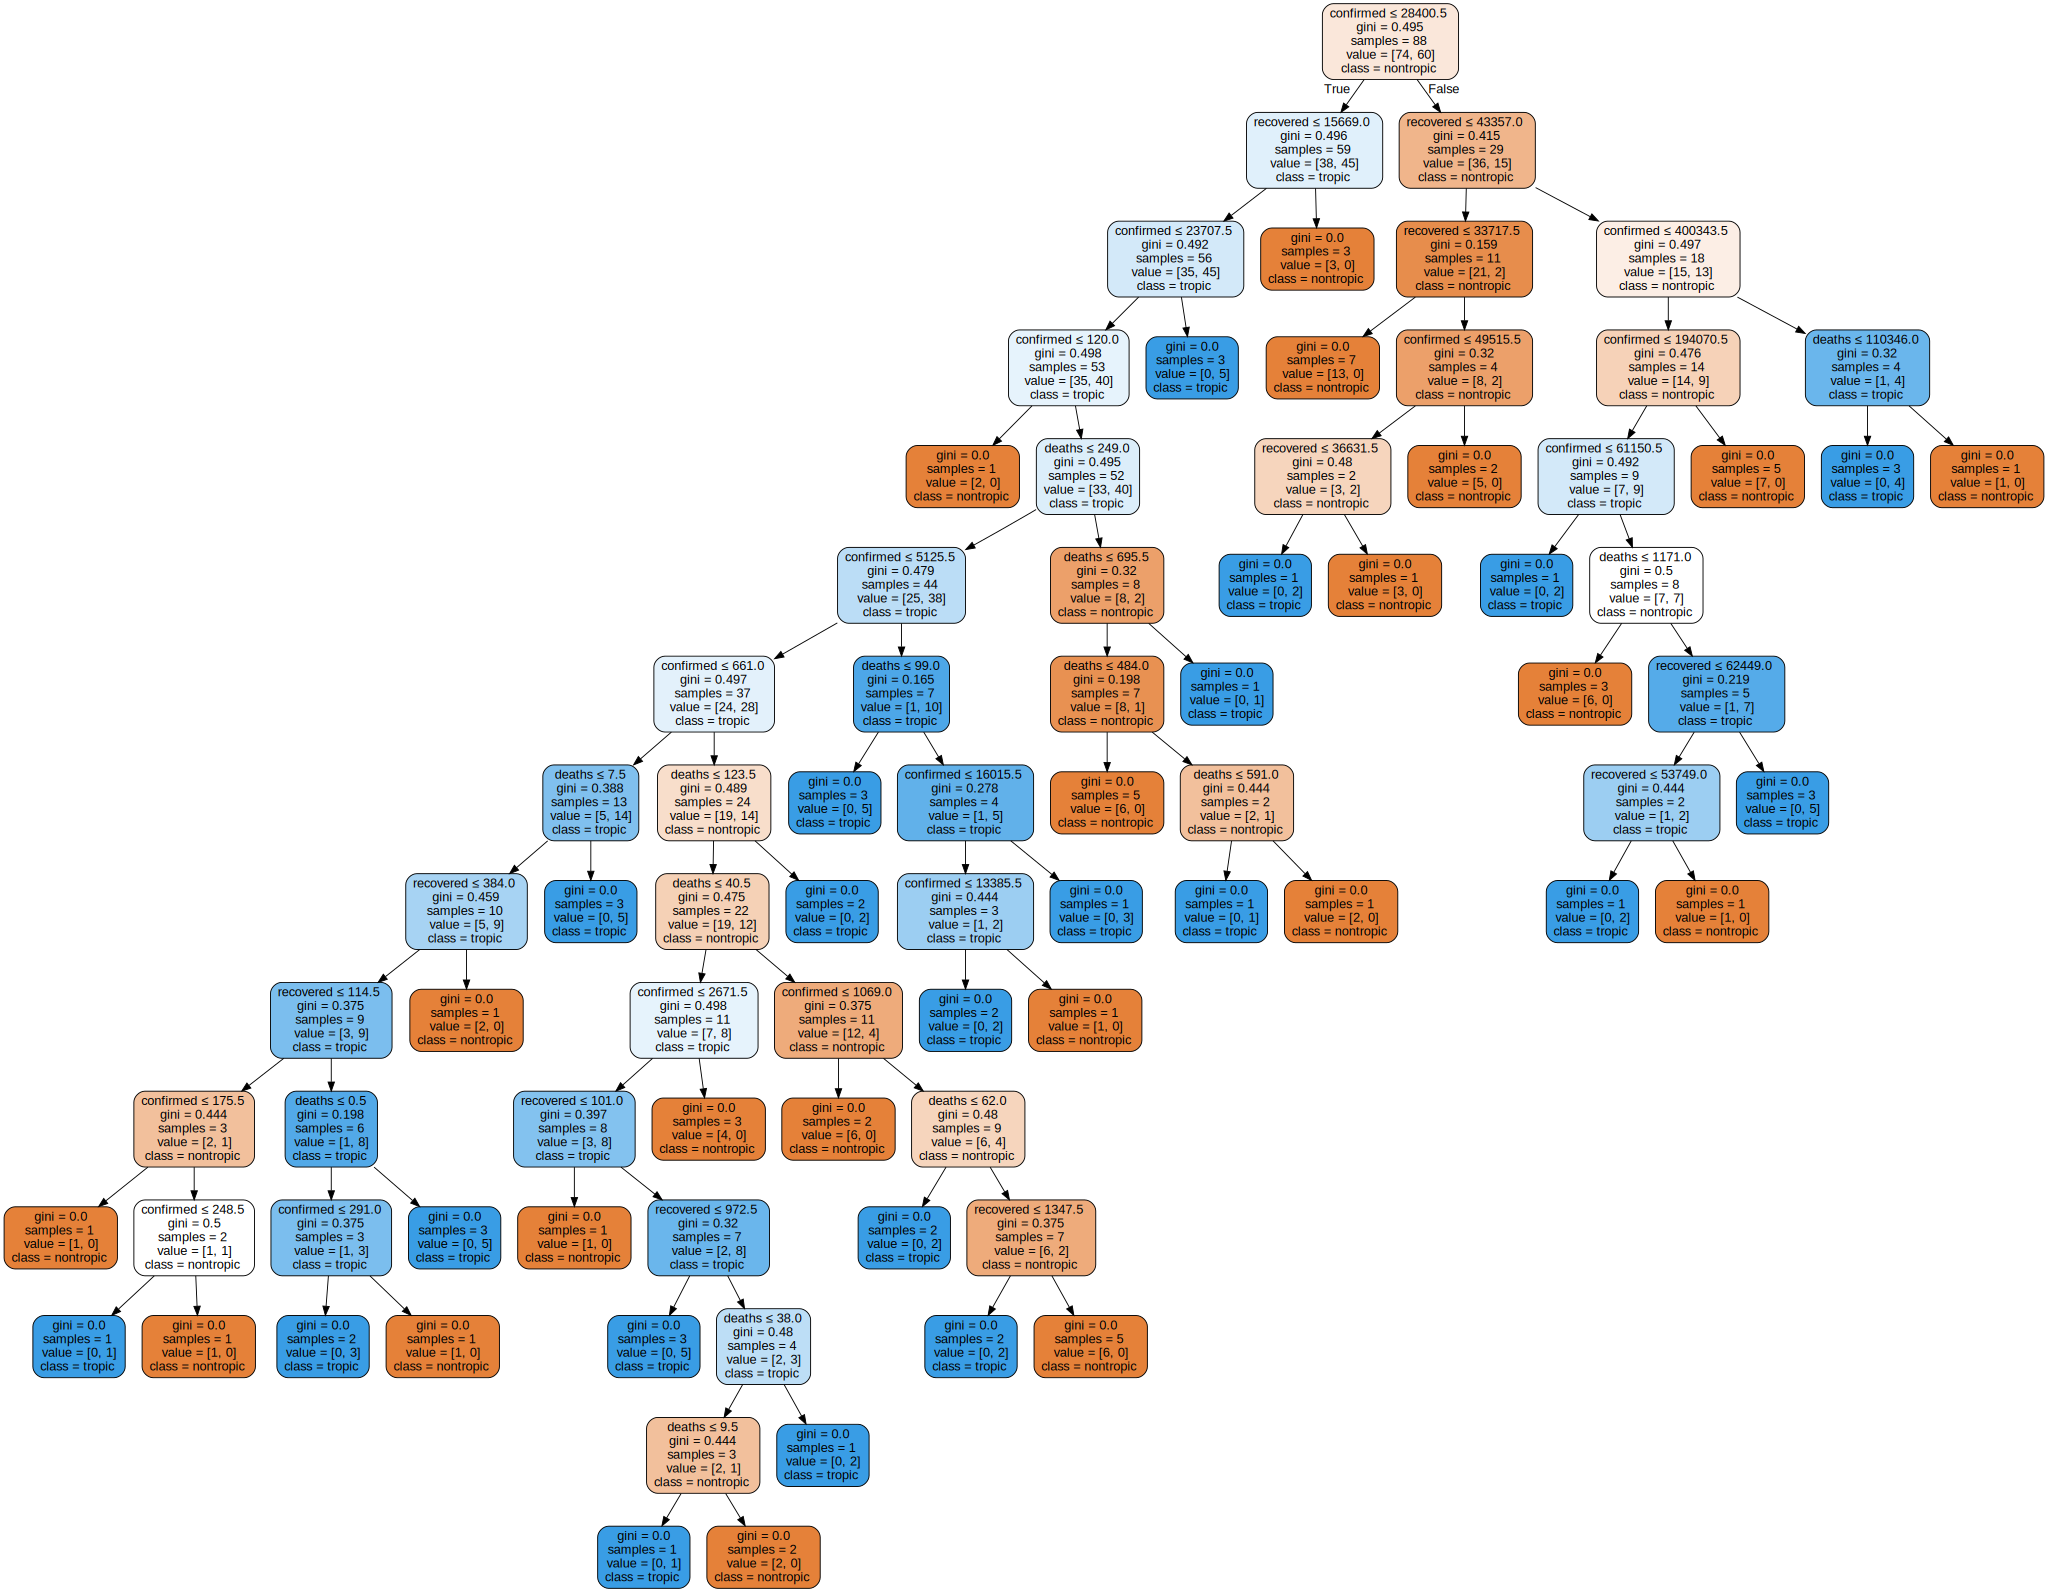

In [24]:
# extract single tree
estimator = clf.estimators_[0]
print(estimator)

# visualizing
fn = ["confirmed", "deaths", "recovered"]
cn = ['nontropic', 'tropic']

dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=fn,
                           class_names=cn,
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
# graph.render('dtree_climate',view=True)

In [25]:
# predict new data
X_new=np.array([[1000,30,200],
                [2000,40,400],
                [50,1,2]])

y_pred = clf.predict(X_new)
print(y_pred)

['tropic' 'tropic' 'nontropic']


Feature: 0, Score: 0.34221
Feature: 1, Score: 0.33081
Feature: 2, Score: 0.32698


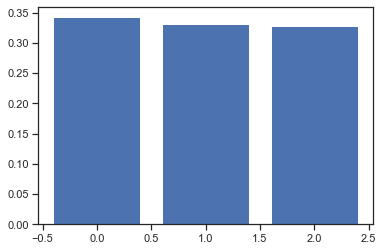

In [26]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Build a linear regression model for the distribution of the number of deaths in the US from 20 March 2020 - 10 August 2020. Plot this regression model. Calculate the R^2 and RMSE values of the model using a train-test split.

Intercept: -12.291814508323455
Coefficient: [0.04952632]
Mean Absolute Error: 455.9550876053263
Mean Squared Error: 3377045.938374152
Root Mean Squared Error: 1837.674056619985
R^2 Score: 0.5621110683048995


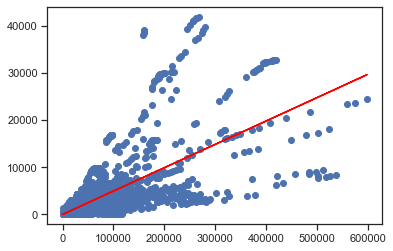

In [27]:
# import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# select date ranges
df_lr = df.set_index('date')
startdate = pd.to_datetime("2020-03-20").date()
enddate = pd.to_datetime("2020-08-10").date()
df_lr = df_lr.loc[startdate : enddate].reset_index()

# train-test split
X = df_lr[['confirmed']]
y = df_lr["deaths"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)

# predict test data
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# scoring
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:', r2_score(y_test, y_pred))

# visualizing
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

#### Build a clustering model with 5 clusters (cluster 0-4) for the 'Z' array. Predict the cluster numbers based on 'confirmed', 'deaths' and 'recovered' data for 'df_last' for the following countries:
<br>
a. Indonesia 4
<br>
b. Singapore 4
<br>
c. US 1
<br>
d. Italy 4
<br>
e. Iran 4

In [28]:
# import library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# data
Z=df_last.loc[:,['confirmed','recovered','deaths']].values
Z[:5]

# normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Z)

# modeling
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
print(kmeans.labels_[:5])

# scoring
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
print("Silhouette Score:", kmeans_silhouette)

# predict new data
df_indonesia = df_last.loc[df_last['country'] == "Indonesia"].iloc[:,2:5]
print(df_indonesia)

df_singapore = df_last.loc[df_last['country'] == "Singapore"].iloc[:,2:5]
print(df_singapore)

df_us = df_last.loc[df_last['country'] == "US"].iloc[:,2:5]
print(df_us)

df_italy = df_last.loc[df_last['country'] == "Italy"].iloc[:,2:5]
print(df_italy)

df_iran = df_last.loc[df_last['country'] == "Iran"].iloc[:,2:5]
print(df_iran)

df_new_pred_cluster = pd.concat([df_indonesia, df_singapore, df_us, df_italy, df_iran])

X = StandardScaler().fit_transform(df_new_pred_cluster)
y_pred = kmeans.predict(X)
print(y_pred)

[4 4 4 4 4]
Silhouette Score: 0.75
    confirmed  deaths  recovered
72     130718    5903      85798
     confirmed  deaths  recovered
141      55395      27      50520
     confirmed  deaths  recovered
164    5197118  166026    1753760
    confirmed  deaths  recovered
77     251713   35225     202697
    confirmed  deaths  recovered
73     333699   18988     290244
[4 4 1 4 4]
